In [3]:
import numpy as np
import seaborn as sns


In [4]:
x_values = [i for i in range(11)]

In [5]:
x_values


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
x_train = np.array(x_values, dtype=np.float32)

In [7]:
x_train

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
      dtype=float32)

In [8]:
x_train = x_train.reshape(-1, 1)

In [9]:
x_train.shape

(11, 1)

In [10]:
y_values = [2 * i + 1 for i in x_values]

In [11]:
y_train = np.array(y_values, dtype=np.float32)

In [12]:
y_train = y_train.reshape(-1, 1)

In [13]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [14]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [15]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.Linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.Linear(x)
        return out

In [16]:
input_dim = 1
output_dim = 1

In [17]:
model = LinearRegressionModel(input_dim, output_dim)

In [18]:
if torch.cuda.is_available():
    model.cuda()


In [73]:
criterion = nn.MSELoss()

In [74]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [75]:
epochs = 100
loss_list=[]
for epoch in range(1, 101):
    
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:    
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()
    
    output = model(inputs)
    
    loss = criterion(output, labels)
    loss_list.append(loss)
    
    loss.backward()
    
    optimizer.step()
    
    

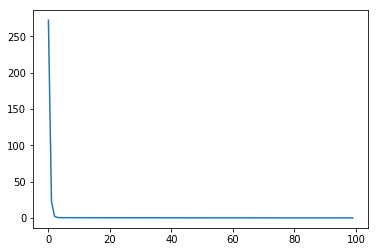

In [76]:
plt.plot(loss_list)

In [78]:
print (model.parameters())

<generator object Module.parameters at 0x000000FC00276258>


In [80]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

In [81]:
predicted

array([[ 0.2181731],
       [ 2.330763 ],
       [ 4.443353 ],
       [ 6.5559435],
       [ 8.668533 ],
       [10.781123 ],
       [12.893714 ],
       [15.006304 ],
       [17.118895 ],
       [19.231485 ],
       [21.344074 ]], dtype=float32)

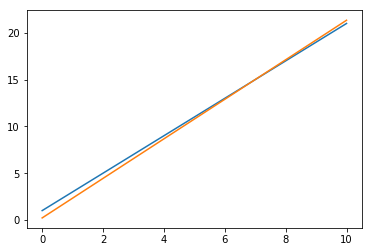

In [83]:
plt.plot(x_train, y_train)
plt.plot(x_train, predicted)

In [84]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'linear_model.pkl')

In [86]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('linear_model.pkl'))